img_path = '![Screenshot 2023-06-11 144546.png](<attachment:Screenshot 2023-06-11 144546.png>)'
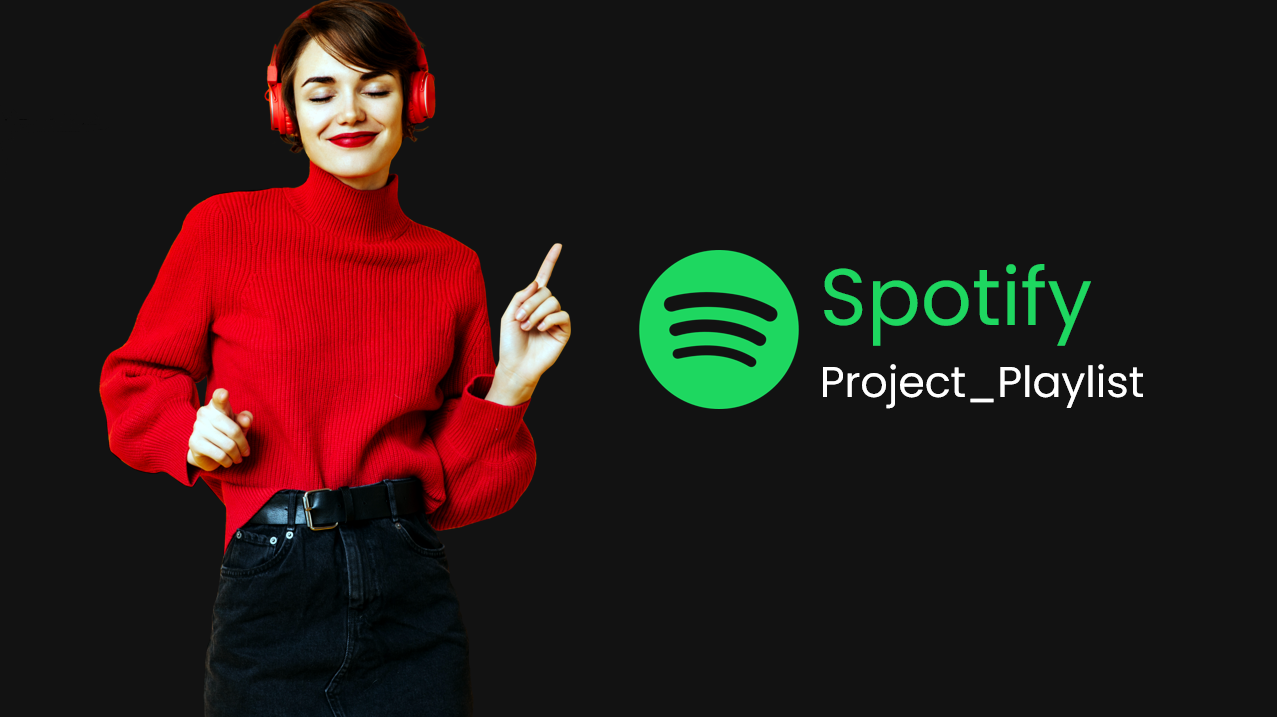

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Read the CSV file
songs = pd.read_csv("df_audio_features_5000")  # Replace "df_audio_features_5000.csv" with the correct file name

if songs is not None:
    # Clean the data
    songs.drop_duplicates(inplace=True)
    songs.dropna(inplace=True)

    if not songs.empty:
        # Strip column names
        songs.columns = songs.columns.str.strip()
        songs.reset_index(drop=True, inplace=True)

        # Scale the numerical columns
        scaler = MinMaxScaler()
        num_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
        songs[num_cols] = scaler.fit_transform(songs[num_cols])

        # Perform K-means clustering
        kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
        kmeans.fit(songs[num_cols])

        # Assign clusters to songs
        songs['cluster'] = kmeans.labels_

        # Print the resulting DataFrame with cluster assignments
        print(songs)
    else:
        print("The DataFrame is empty after removing duplicates or missing values.")
else:
    print("Failed to read the CSV file. Please check the file path and make sure it is correct.")


                                                   name  \
0     Se Eu Quiser Falar Com Deus                   ...   
1     Saudade De Bahia                              ...   
2     Canta Canta, Minha Gente                      ...   
3     Mulher Eu Sei                                 ...   
4     Rosa Morena                                   ...   
...                                                 ...   
5170  1812 Festival Overture, Op. 49: 1812 Overture,...   
5171  Winter Fragments pour ensemble instrumental, s...   
5172  Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...   
5173  Serenade For Strings In E, Op.22, B. 52: 1. Mo...   
5174  Ravel: Boléro, M. 81                          ...   

                                                artist  danceability   energy  \
0     Gilberto Gil                                          0.680455  0.25900   
1     Antônio Carlos Jobim                                  0.767322  0.39900   
2     Martinho Da Vila                          

c:\Users\chris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [3]:
songs=songs.sample(30)
songs.groupby("cluster").count()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
cluster,,,,,,,,,,,,,,,,,,
0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
1,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
4,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12


In [4]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd

client_id = ''  
client_secret = ''  
redirect_uri = ''
scope = ''

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=client_id, client_secret=client_secret, redirect_uri=redirect_uri, scope=scope))

for cluster_id in songs['cluster'].unique():

    cluster_songs = songs[songs['cluster'] == cluster_id]

    playlist_name = f'Cluster {cluster_id} Playlist'
    playlist_description = f'A playlist with representative songs from cluster {cluster_id}'
    playlist = sp.user_playlist_create(user='YOUR_USERNAME', name=playlist_name, public=True, description=playlist_description)  
    playlist_id = playlist['id']
    
    song_ids = cluster_songs['id']
    song_ids = [song_id.strip() for song_id in song_ids]
    track_uris = [f'spotify:track:{song_id}' for song_id in song_ids]
    sp.playlist_add_items(playlist_id=playlist_id, items=track_uris)
    print(f'Added {len(track_uris)} songs to {playlist_name}')

Using `localhost` as redirect URI without a port. Specify a port (e.g. `localhost:8080`) to allow automatic retrieval of authentication code instead of having to copy and paste the URL your browser is redirected to.
